In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()
import MathOptInterface as MOI
import Ipopt 
using LinearAlgebra, Plots
import FiniteDiff
import ForwardDiff as FD
using MeshCat
using Test
using Plots

  Activating project at `c:\Users\aphia\Desktop\school\ocrl\QuadraCat`


In [229]:
# include the functions from quadruped.jl
include(joinpath(@__DIR__, "utils", "quadruped.jl"))

get_trunk_velocity (generic function with 1 method)

In [209]:
model = UnitreeA1() # contains all the model properties for the quadruped
mvis = initialize_visualizer(model)
state = MechanismState(model.mech)

┌ Info: Listening on: 127.0.0.1:8748, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8748
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MechanismState{Float64, Float64, Float64, …}(…)

In [192]:
function get_trunk_position(model::UnitreeA1, q)
    mech = model.mech 
    T = eltype(q)
    state = MechanismState{T}(mech)
    set_configuration!(state, q)

    trunk = findbody(mech, "trunk")
    tf_world = transform_to_root(state, default_frame(trunk))
    # world = findbody(mech, "world") 
    # tf_world = relative_transform(state, default_frame(world), default_frame(trunk))
    return translation(tf_world)
end

function get_foot_position(model::UnitreeA1, q, foot="RR")
    mech = model.mech 
    T = eltype(q)
    state = MechanismState{T}(mech)
    set_configuration!(state, q)

    foot_body = findbody(mech, foot * "_foot")
    tf_world = transform_to_root(state, default_frame(foot_body))
    # world = findbody(mech, "world") 
    # tf_world = relative_transform(state, default_frame(world), default_frame(foot_body))
    return translation(tf_world)
end

function get_trunk_velocity(model::UnitreeA1, x)
    mech = model.mech 
    T = eltype(x)
    state = MechanismState{T}(mech)
    copyto!(state, x)
    trunk = findbody(mech, "trunk")
    twist = twist_wrt_world(state, trunk)
    v = linear(twist)
    return v
end

get_trunk_velocity (generic function with 1 method)

In [193]:
tf = 0.5
dt = 0.1

t_vec = 0:dt:tf 
N = length(t_vec)
#X = [zeros(state_dim(model)) for i in 1:N]

6

In [ ]:
des_height = 0.5 # fill in 

g = 9.81
v_takeoff = sqrt(des_height*2*g)
v_des_vec = zeros(num_velocities(model.mech))
v_des_vec[6] = v_takeoff #v_des_vec[6] = v_takeoff
v_des_vec[4] = 1.5

1.5

In [230]:
xic = initial_state(model)
set_configuration!(state, xic[1:num_positions(model.mech)])

set_velocity!(state, v_des_vec)
ts, qs, vs = simulate(state, tf; Δt = 1e-2)
anim = MeshCat.Animation(mvis, ts, qs)
setanimation!(mvis, anim)
render(mvis)

MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x77, 0x6f, 0x72, 0x6c, 0x64, 0x2f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("trunk" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x62, 0x61, 0x73, 0x65, 0x2f, 0x74, 0x72, 0x75, 0x6e, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_floating_base" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x61, 0x74, 0x69, 0x6e, 0x67, 0x5f, 0x62, 0x61, 0x73, 0x65], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_hip" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x75, 0x6e, 0x6b, 0x2f, 0x52, 0x4c, 0x5f, 0x68, 0x69, 0x70], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x70, 0x2f, 0x52, 0x4c, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_17" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x37], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RL_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x67, 0x68, 0x2f, 0x52, 0x4c, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RL_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6c, 0x66, 0x2f, 0x52, 0x4c, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RL_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0

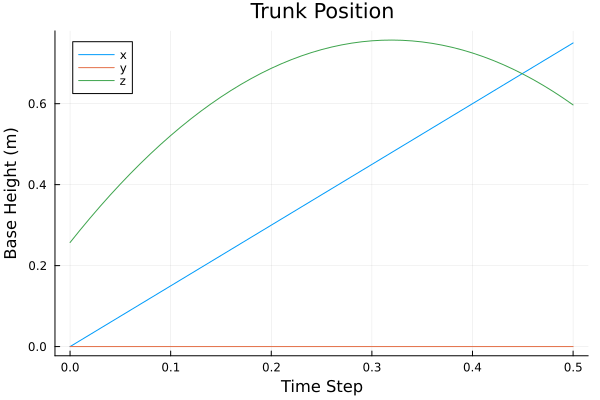

In [224]:
# ------------plotting--------------
Xm = hcat(qs...)
#Um = hcat(U...)

plot(ts, Xm[5:7, :]', xlabel="Time Step", ylabel="Base Height (m)", title="Trunk Position", label=["x" "y" "z"])

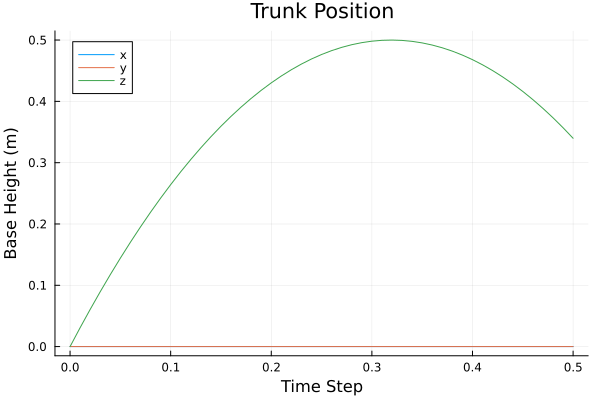

In [202]:
trunk_poss = [get_trunk_position(model, qs[i]) for i in 1:length(qs)]
trunk_poss_m = hcat(trunk_poss...)
plot(ts, trunk_poss_m', xlabel="Time Step", ylabel="Base Height (m)", title="Trunk Position", label=["x" "y" "z"])

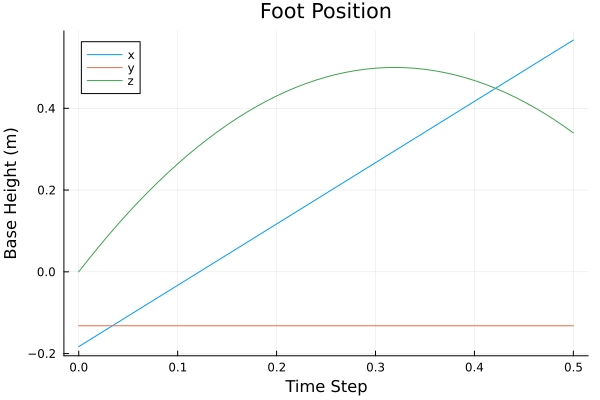

In [225]:
RR_foot_poss = [get_foot_position(model, qs[i]) for i in 1:length(qs)]
RR_foot_poss_m = hcat(RR_foot_poss...)
plot(ts, RR_foot_poss_m', xlabel="Time Step", ylabel="Base Height (m)", title="Foot Position", label=["x" "y" "z"])

In [ ]:
RR_foot_poss = [get_trunk_velocity(model, [qs[i];vs[i]]) for i in 1:length(qs)]
RR_foot_poss_m = hcat(RR_foot_poss...)
plot(ts, RR_foot_poss_m', xlabel="Time Step", ylabel="Base Height (m)", title="Trunk Velocity", label=["x" "y" "z"])

# ATTEMPT TO SOLVE CROUCHING

In [150]:
# include the functions from quadruped.jl
include(joinpath(@__DIR__, "utils", "fmincon.jl"))
include(joinpath(@__DIR__, "utils", "quadruped.jl"))
model = UnitreeA1()

UnitreeA1{StateCache{Float64, TypeSortedCollections.TypeSortedCollection{Tuple{Vector{Joint{Float64, Revolute{Float64}}}, Vector{Joint{Float64, Fixed{Float64}}}}, 2}}}(Spanning tree:
Vertex: world (root)
  Vertex: dummy1_RR, Edge: foot_joint_x_RR
    Vertex: dummy2_RR, Edge: foot_joint_y_RR
      Vertex: RR_foot, Edge: foot_joint_z_RR
        Vertex: RR_calf, Edge: RR_foot_fixed
          Vertex: RR_thigh, Edge: RR_calf_joint
            Vertex: RR_hip, Edge: RR_thigh_joint
              Vertex: trunk, Edge: RR_hip_joint
                Vertex: imu_link, Edge: imu_joint
                Vertex: FR_hip, Edge: FR_hip_joint
                  Vertex: FR_thigh, Edge: FR_thigh_joint
                    Vertex: FR_calf, Edge: FR_calf_joint
                      Vertex: FR_foot, Edge: FR_foot_fixed
                Vertex: FL_hip, Edge: FL_hip_joint
                  Vertex: FL_thigh, Edge: FL_thigh_joint
                    Vertex: FL_calf, Edge: FL_calf_joint
                      Vertex: FL_f

In [155]:
@show num_positions(model.mech)
@show num_velocities(model.mech)
@show get_trunk_position(model, q)
@show get_foot_position(model, q, "RR")
@show get_foot_position(model, q, "FL")
@show get_trunk_velocity(model, xic)
@show joints(model.mech)

num_positions(model.mech) = 17
num_velocities(model.mech) = 17
get_trunk_position(model, q) = [-2.7755575615628914e-17, 0.0, 0.2571150438746157]
get_foot_position(model, q, "RR") = [-0.183, -0.13205, 0.0]
get_foot_position(model, q, "FL") = [0.18299999999999988, 0.13205, -8.326672684688674e-17]
get_trunk_velocity(model, xic) = [0.0, 0.0, 0.0]
joints(model.mech) = Joint{Float64, JT} where JT<:JointType{Float64}[Joint "foot_joint_x_RR": Revolute joint with axis [1.0, 0.0, 0.0], Joint "foot_joint_y_RR": Revolute joint with axis [0.0, 1.0, 0.0], Joint "foot_joint_z_RR": Revolute joint with axis [0.0, 0.0, 1.0], Joint "RR_foot_fixed": Fixed joint, Joint "RR_calf_joint": Revolute joint with axis [-0.0, -1.0, -0.0], Joint "RR_thigh_joint": Revolute joint with axis [-0.0, -1.0, -0.0], Joint "RR_hip_joint": Revolute joint with axis [-1.0, -0.0, -0.0], Joint "imu_joint": Fixed joint, Joint "FR_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0], Joint "FL_hip_joint": Revolute joint with axis [1

24-element Vector{Joint{Float64, JT} where JT<:JointType{Float64}}:
 Joint "foot_joint_x_RR": Revolute joint with axis [1.0, 0.0, 0.0]
 Joint "foot_joint_y_RR": Revolute joint with axis [0.0, 1.0, 0.0]
 Joint "foot_joint_z_RR": Revolute joint with axis [0.0, 0.0, 1.0]
 Joint "RR_foot_fixed": Fixed joint
 Joint "RR_calf_joint": Revolute joint with axis [-0.0, -1.0, -0.0]
 Joint "RR_thigh_joint": Revolute joint with axis [-0.0, -1.0, -0.0]
 Joint "RR_hip_joint": Revolute joint with axis [-1.0, -0.0, -0.0]
 Joint "imu_joint": Fixed joint
 Joint "FR_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0]
 Joint "FL_hip_joint": Revolute joint with axis [1.0, 0.0, 0.0]
 ⋮
 Joint "FR_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0]
 Joint "FL_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0]
 Joint "RL_calf_joint": Revolute joint with axis [0.0, 1.0, 0.0]
 Joint "FR_foot_fixed": Fixed joint
 Joint "FL_foot_fixed": Fixed joint
 Joint "RL_foot_fixed": Fixed joint
 Joint "foot_joint_x_RL":

In [133]:
println("🔁 Revolute joints in the mechanism:")
for j in joints(model.mech)
    if typeof(j) <: Joint{Float64, Revolute{Float64}}
        println("  - ", j.name, " :: ", typeof(j))
    end
end

🔁 Revolute joints in the mechanism:
  - FR_hip_joint :: Joint{Float64, Revolute{Float64}}
  - FL_hip_joint :: Joint{Float64, Revolute{Float64}}
  - RR_hip_joint :: Joint{Float64, Revolute{Float64}}
  - RL_hip_joint :: Joint{Float64, Revolute{Float64}}
  - FR_thigh_joint :: Joint{Float64, Revolute{Float64}}
  - FL_thigh_joint :: Joint{Float64, Revolute{Float64}}
  - RR_thigh_joint :: Joint{Float64, Revolute{Float64}}
  - RL_thigh_joint :: Joint{Float64, Revolute{Float64}}
  - FR_calf_joint :: Joint{Float64, Revolute{Float64}}
  - FL_calf_joint :: Joint{Float64, Revolute{Float64}}
  - RR_calf_joint :: Joint{Float64, Revolute{Float64}}
  - RL_calf_joint :: Joint{Float64, Revolute{Float64}}
  - foot_joint_x_RR :: Joint{Float64, Revolute{Float64}}
  - foot_joint_y_RR :: Joint{Float64, Revolute{Float64}}
  - foot_joint_z_RR :: Joint{Float64, Revolute{Float64}}
  - foot_joint_x_RL :: Joint{Float64, Revolute{Float64}}
  - foot_joint_y_RL :: Joint{Float64, Revolute{Float64}}
  - foot_joint_z_RL

In [156]:
xic = initial_state(model)
q = xic[1:num_positions(model.mech)]

17-element Vector{Float64}:
  0.0
 -0.8726646259971648
  0.0
 -1.7453292519943295
  0.8726646259971648
  0.0
  0.0
  0.0
  0.0
  0.8726646259971648
  0.8726646259971648
  0.8726646259971648
 -1.7453292519943295
 -1.7453292519943295
 -1.7453292519943295
  0.0
  0.0

In [157]:
# visualize initial state
mvis = initialize_visualizer(model)
xic = initial_state(model)
set_configuration!(mvis, xic[1:state_dim(model)÷2])
render(mvis)

┌ Info: Listening on: 127.0.0.1:8742, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8742
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy1_RR" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x31, 0x5f, 0x52, 0x52], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy2_RR" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x32, 0x5f, 0x52, 0x52], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RR_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x52, 0x52, 0x2f, 0x52, 0x52, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6f, 0x6f, 0x74, 0x5f, 0x66, 0x69, 0x78, 0x65, 0x64], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_15" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x35], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RR_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x74, 0x2f, 0x52, 0x52, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_calf_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x63, 0x61, 0x6c, 0x66, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_14" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x34], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x34], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RR_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x2f, 0x52, 0x52, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_13" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61

In [158]:
# visualize goal state
mvis = initialize_visualizer(model)
xg = hind_legs_state(model)
set_configuration!(mvis, xg[1:state_dim(model)÷2])
render(mvis)

┌ Info: Listening on: 127.0.0.1:8743, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8743
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy1_RR" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x31, 0x5f, 0x52, 0x52], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy2_RR" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x32, 0x5f, 0x52, 0x52], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RR_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x52, 0x52, 0x2f, 0x52, 0x52, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6f, 0x6f, 0x74, 0x5f, 0x66, 0x69, 0x78, 0x65, 0x64], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_15" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x35], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RR_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x74, 0x2f, 0x52, 0x52, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_calf_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x63, 0x61, 0x6c, 0x66, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_14" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x34], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x34], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RR_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x2f, 0x52, 0x52, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_13" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x33], UInt8[0x83, 0xa6, 0x6d, 0x61

In [179]:
## set up discrete time dynamics

# our continuous time dynamics function is xdot = dynamics(model, x, u)

function hermite_simpson_ground(params::NamedTuple, x1::Vector, x2::Vector, u::Vector, dt::Real)::Vector
    model = params.model
    x12 = 0.5*(x1+x2) + dt/8*(dynamics(model, x1, u) - dynamics(model, x2, u))
    return x1 + dt/6 * (dynamics(model, x1, u) + 4 * dynamics(model, x12, u) + dynamics(model, x2, u)) - x2
end

hermite_simpson_ground (generic function with 1 method)

In [180]:
function create_idx(nx,nu,N)
    # This function creates some useful indexing tools for Z 
    # x_i = Z[idx.x[i]]
    # u_i = Z[idx.u[i]]    
    
    # our Z vector is [x0, u0, x1, u1, …, xN]
    nz = (N-1) * nu + N * nx # length of Z 
    x = [(i - 1) * (nx + nu) .+ (1 : nx) for i = 1:N]
    u = [(i - 1) * (nx + nu) .+ ((nx + 1):(nx + nu)) for i = 1:(N - 1)]
    
    # constraint indexing for the (N-1) dynamics constraints when stacked up
    c = [(i - 1) * (nx) .+ (1 : nx) for i = 1:(N - 1)]
    nc = (N - 1) * nx # (N-1)*nx 
    
    return (nx=nx,nu=nu,N=N,nz=nz,nc=nc,x= x,u = u,c = c)
end

create_idx (generic function with 1 method)

In [181]:
## set up cost

function quadracat_cost(params::NamedTuple, Z::Vector)::Real
    idx, N, xg = params.idx, params.N, params.xg
    Q, R, Qf = params.Q, params.R, params.Qf
    Xref,Uref = params.Xref, params.Uref

    J = 0
    for i=1:(N-1)
        J += 0.5*(Z[idx.x[i]] - Xref[i])'*Q*(Z[idx.x[i]] - Xref[i]) + 0.5*(Z[idx.u[i]] - Uref[i])'*R*(Z[idx.u[i]] - Uref[i])
    end
    J += (Z[idx.x[N]] - Xref[N])'*Qf*(Z[idx.x[N]] - Xref[N])
        
    return J

end

quadracat_cost (generic function with 1 method)

In [182]:
## set up equality constraints 

function quadracat_dynamics_constraints(params::NamedTuple, Z::Vector)::Vector
    idx, N, dt = params.idx, params.N, params.dt

    c = zeros(eltype(Z), idx.nc)

    for i=1:(N-1)
        xk = Z[idx.x[i]]
        uk = Z[idx.u[i]]
        xk1 = Z[idx.x[i+1]]

        c[idx.c[i]] = hermite_simpson_ground(params, xk, xk1, uk, dt)
    end
    return c 
end

function quadracat_stance_constraint(params::NamedTuple, Z::Vector)::Vector
    idx, N, dt, model = params.idx, params.N, params.dt, params.model
    nq = params.nq
        
    # create c in a ForwardDiff friendly way (check HW0)
    c = zeros(eltype(Z), N*4)
    
    # each foot is pinned to the ground
    for i=1:length(N)
        xk = Z[idx.x[i]]
        q = xk[1:nq]
        c[4*(i-1) .+ (1:4)] = [
                            get_foot_position(model, q, "RR")[3] + 0.4; 
                            get_foot_position(model, q, "RL")[3] + 0.4;
                            get_foot_position(model, q, "FL")[3] + 0.4;
                            get_foot_position(model, q, "FR")[3] + 0.4
                            ]
    end

    return c

end

function quadracat_equality_constraint(params::NamedTuple, Z::Vector)::Vector
    N, idx, xic = params.N, params.idx, params.xic
    
    # TODO: stack up all of our equality constraints 
    
    # should be length 2*nx + (N-1)*nx + N 
    # inital condition constraint (nx)       (constraint 1)
    # terminal constraint         (nx)       (constraint 2)
    # dynamics constraints        (N-1)*nx   (constraint 3-6)
    # stance constraint           N          (constraint 7-8)
    ic_con = Z[idx.x[1]] - xic
    return [ic_con; 
    quadracat_dynamics_constraints(params, Z); 
    #quadracat_stance_constraint(params, Z)
    ]
end

quadracat_equality_constraint (generic function with 1 method)

In [183]:
## set up inequality constraint 

function quadracat_inequality_constraint(params::NamedTuple, Z::Vector)::Vector
    idx, N, dt = params.idx, params.N, params.dt
    model = params.model
    v_takeoff = params.v_takeoff
        
    # create c in a ForwardDiff friendly way (check HW0)
    c = zeros(eltype(Z), 2*N)
    for i=1:N 
        c[2*(i-1) .+ (1:2)] = [
            get_foot_position(model, q, "FL")[3];
            get_foot_position(model, q, "FR")[3]
        ]
    end
    # final velocity is close to desired velocity
    # xN = Z[idx.x[N]]
    # c = [c; get_trunk_velocity(model, xN)[3] - v_takeoff]

    return c
end

quadracat_inequality_constraint (generic function with 1 method)

In [184]:
## reference trajectory (random noise)

function reference_trajectory(xic::Vector, xg::Vector, N::Int, nu::Int)
    Uref = [0.001*randn(nu) for i in 1:(N-1)]

    # Xref = [0.001*randn(params.nx) for i in 1:N]
    # Xref[1] = xic
    # Xref[N] = xg
    Xref = range(xic, xg, N)

    return Xref, Uref
end

reference_trajectory (generic function with 2 methods)

In [185]:
function solve_quadracat_crouch(;verbose=true)
    
    # problem size 
    nq = num_positions(model.mech)
    nv = num_velocities(model.mech)
    nx = nq+nv
    nu = control_dim(model)
    # placeholder values for now. might need to tweak
    tf = 1
    dt = 0.1
    
    t_vec = 0:dt:tf 
    N = length(t_vec)
    
    # LQR cost 
    Q = diagm(ones(nx))
    R = 0.1*diagm(ones(nu))
    Qf = 10*diagm(ones(nx))
    
    # indexing 
    idx = create_idx(nx,nu,N)
    
    # initial and goal states 
    xic = initial_state(model)
    xg = hind_legs_state(model)

    # reference_trajectory 
    Xref, Uref = reference_trajectory(xic, xg, N, nu)

    # load all useful things into params 
    params = (
        model=model,
        nx=nx, 
        nu=nu, 
        nq=nq,
        nv=nv,
        Q = Q, 
        R = R, 
        Qf = Qf, 
        xic = xic, 
        xg=xg,
        dt = dt, 
        N = N, 
        idx = idx,
        g = 9.81,
        v_takeoff=v_takeoff,
        Xref=Xref,
        Uref=Uref
        )
    
    # TODO: primal bounds 
    # height of body must be above ground BUT this is not a state variable so don't set it here
    x_l = -Inf*ones(idx.nz)
    x_u = Inf*ones(idx.nz)
    # for i = 1:N
    #     x_l[idx.x[i][3]] = 0
    # end
    
    # inequality constraint bounds
    c_l = zeros(2*N)
    c_u = Inf*ones(2*N)
    # c_l = [zeros(2*N); -Inf] #zeros(0)
    # c_u = [Inf*ones(2*N); 0.1]
    # function inequality_constraint(params, Z)
    #     return zeros(eltype(Z), 0)
    # end
    
    # initial guess 
    z0 = zeros(idx.nz)
    for i=1:(N-1)
        z0[idx.x[i]] = Xref[i]
        z0[idx.u[i]] = Uref[i]
    end
    z0[idx.x[N]] = Xref[N]
    
    # choose diff type (try :auto, then use :finite if :auto doesn't work)
    diff_type = :auto 
#     diff_type = :finite
    
    
    Z = fmincon(quadracat_cost,quadracat_equality_constraint,quadracat_inequality_constraint,
                x_l,x_u,c_l,c_u,z0,params, diff_type;
                tol = 1e-6, c_tol = 1e-6, max_iters = 10_000, verbose = verbose)
    
    # pull the X and U solutions out of Z 
    X = [Z[idx.x[i]] for i = 1:N]
    U = [Z[idx.u[i]] for i = 1:(N-1)]
    
    return X, U, t_vec, params 
end

solve_quadracat_crouch (generic function with 1 method)

In [186]:
X, U, t_vec, params_dircol = solve_quadracat_crouch(verbose=true)

---------checking dimensions of everything----------
---------all dimensions good------------------------
---------diff type set to :auto (ForwardDiff.jl)----
---------testing objective gradient-----------------
---------testing constraint Jacobian----------------
---------successfully compiled both derivatives-----
---------IPOPT beginning solve----------------------
This is Ipopt version 3.14.17, running with linear solver MUMPS 5.7.3.

Number of nonzeros in equality constraint Jacobian...:   184756
Number of nonzeros in inequality constraint Jacobian.:    10868
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:      494
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      374
Total number of inequality constraints......

([[0.0, -0.8726646259971648, 0.0, -1.7453292519943295, 0.8726646259971648, 0.0, 0.0, 0.0, 0.0, 0.8726646259971648  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.011465662839719452, -0.919071348872597, 0.014746732827940508, -1.8089523545593145, 0.7584622060679674, -0.06976380814158041, -0.0037271400666200757, 0.002828184872175162, -0.01951951455507847, 0.8558305341193714  …  0.034632341359548, -0.609909213241713, -0.5494599617472504, -0.6281560603983295, -7.035206367245429, 1.2788712107081905, 1.2681901283889456, 3.8682895996952906, 0.7763085707444857, -3.547437584668003], [0.12636013716642902, -0.9903276795771941, 0.11518910083230317, -1.9779231947030527, 0.44140542366551816, -0.21657353071343016, 0.0008905728392283303, 0.01685096751690899, -0.07713738658456643, 0.8061733435916402  …  -0.03097673640545381, -0.5121287995179924, -0.9242773512702263, -0.999730995735778, -6.752167380885083, 1.2521423252087016, 1.2976100002217223, 0.27258747979923575, 0.49122649957903985, -3.3353

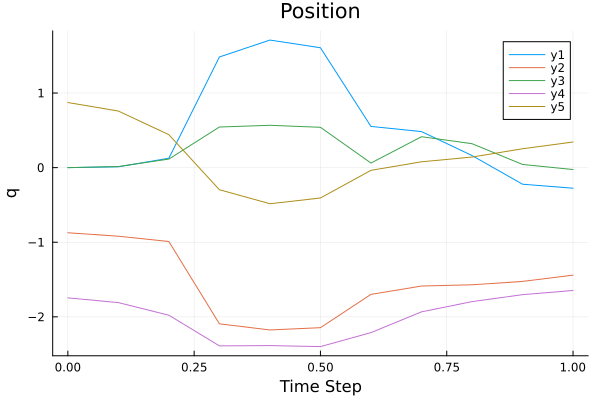

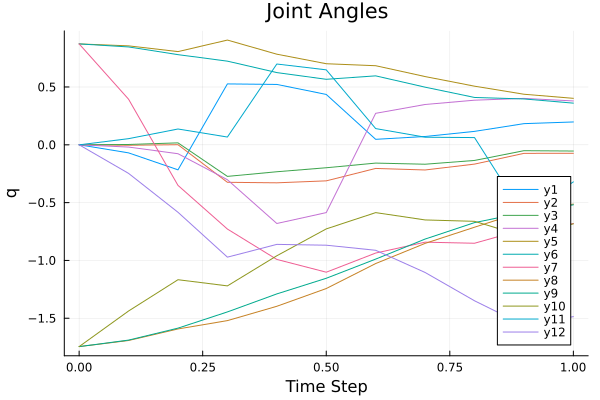

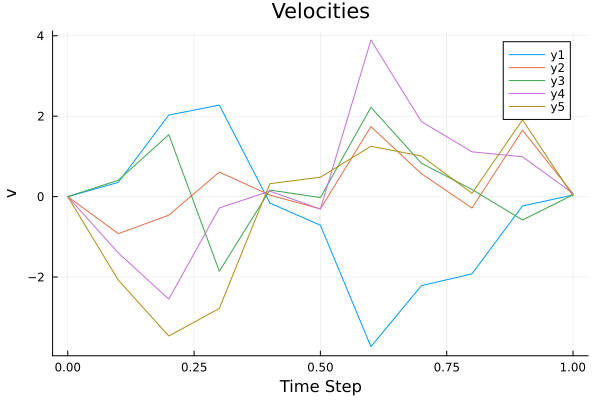

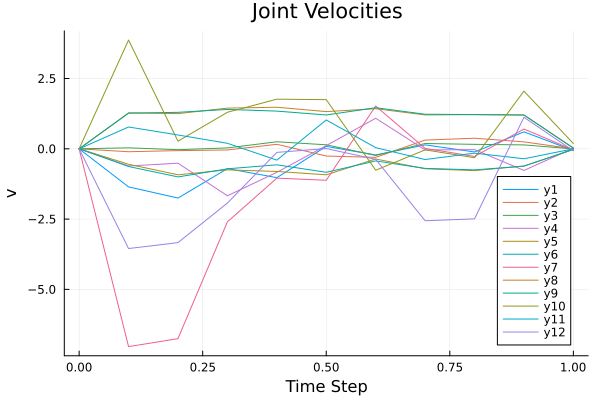

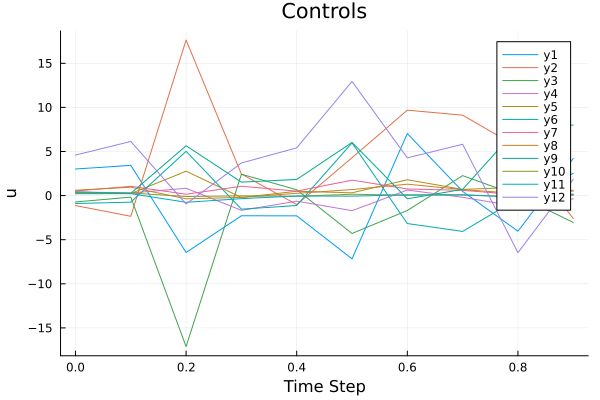

In [187]:
# ------------plotting--------------
Xm = hcat(X...)
Um = hcat(U...)

display(plot(t_vec, Xm[1:5,:]', xlabel="Time Step", ylabel="q", title="Position"))
display(plot(t_vec, Xm[6:17,:]', xlabel="Time Step", ylabel="q", title="Joint Angles"))
display(plot(t_vec, Xm[18:22,:]', xlabel="Time Step", ylabel="v", title="Velocities"))
display(plot(t_vec, Xm[23:end,:]', xlabel="Time Step", ylabel="v", title="Joint Velocities"))
display(plot(t_vec[1:end-1], Um', xlabel="Time Step", ylabel="u", title="Controls"))

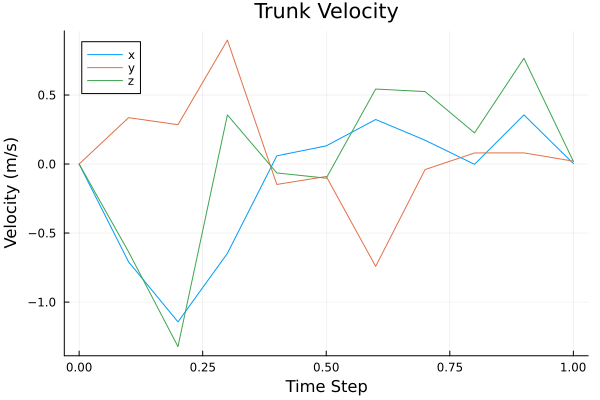

In [188]:
trunk_vel = [get_trunk_velocity(model, X[i]) for i in 1:length(X)]
trunk_vel_m = hcat(trunk_vel...)
plot(t_vec, trunk_vel_m', xlabel="Time Step", ylabel="Velocity (m/s)", title="Trunk Velocity", label=["x" "y" "z"])

In [ ]:
qs = [xk[1:num_positions(model.mech)] for xk in X] # extract positions from state vector

mvis = initialize_visualizer(model)
xic = initial_state(model)
set_configuration!(mvis, xic[1:num_positions(model.mech)])
anim = MeshCat.Animation(mvis, t_vec, qs)
setanimation!(mvis, anim)s
render(mvis)

┌ Info: Listening on: 127.0.0.1:8746, thread id: 1
└ @ HTTP.Servers C:\Users\aphia\.julia\packages\HTTP\MIUdD\src\Servers.jl:382
┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8746
└ @ MeshCat C:\Users\aphia\.julia\packages\MeshCat\9QrxD\src\visualizer.jl:43


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), UInt8[0x83, 0xa7, 0x6f, 0x70, 0x74, 0x69, 0x6f, 0x6e, 0x73, 0x82  …  0x5f, 0x61, 0x6e, 0x69, 0x6d, 0x61, 0x74, 0x69, 0x6f, 0x6e], Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("block" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x63, 0x61, 0x74, 0x2f, 0x62, 0x6c, 0x6f, 0x63, 0x6b], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "world" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy1_RR" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x31, 0x5f, 0x52, 0x52], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("dummy2_RR" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x2f, 0x64, 0x75, 0x6d, 0x6d, 0x79, 0x32, 0x5f, 0x52, 0x52], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("RR_foot" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x52, 0x52, 0x2f, 0x52, 0x52, 0x5f, 0x66, 0x6f, 0x6f, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_foot_fixed" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x6f, 0x6f, 0x74, 0x5f, 0x66, 0x69, 0x78, 0x65, 0x64], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_15" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x35], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x35], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RR_calf" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x6f, 0x74, 0x2f, 0x52, 0x52, 0x5f, 0x63, 0x61, 0x6c, 0x66], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_calf_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x63, 0x61, 0x6c, 0x66, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_14" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x34], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x65, 0x6f, 0x6d, 0x65, 0x74, 0x72, 0x79, 0x5f, 0x31, 0x34], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))), "RR_thigh" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x66, 0x2f, 0x52, 0x52, 0x5f, 0x74, 0x68, 0x69, 0x67, 0x68], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("after_RR_thigh_joint" => MeshCat.SceneTrees.SceneNode(nothing, UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x68, 0x69, 0x67, 0x68, 0x5f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("geometry_13" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0

In [ ]:
Hi OCRL Instructors,




My final project team is working on trajectory optimization of quadruped jumping, and we are building on top of the quadruped.jl model for the UnitreeA1 given in HW1. However, we are running into several issues with modeling contact constraints with the RigidBodyDynamics package and getting the solver to converge. I'm wondering if we can get any advice on if we're heading in the right direction? I was planning to head to office hours this week but I saw that there aren't any more office hours for the rest of the semester.




I have currently simplified the problem down to finding the optimal control sequence between a specified crouching pose and a standing pose, both in the pre-jump phase. The back two feet are pinned to the ground using the attach_foot! function in quadruped.jl. The front two feet are given an inequality constraint for them to remain above ground. I run IPOPT on this, it takes about 20 minutes to converge, but then the output does not meet any of the constraints (pinned feet, feet above ground, terminal state) that I have given. 



I have also tried not pinning any feet (keeping the floating body joint), and specifying an inequality constraint that all four feet must remain above ground. I haven't gotten the solver to converge in this case. 



Any advice would be appreciated! Thank you!